<a href="https://colab.research.google.com/github/kdemertzis/ML_BigData_CyberSecurity-test/blob/master/Demo/ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>
## <div style="text-align: center">Machine Learning with Scikit-Learn  </div>

Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib!
**
#### The functionality that scikit-learn provides include:

- **Regression**, including Linear and Logistic Regression
- **Classification**, including K-Nearest Neighbors
- **Clustering**, including K-Means and K-Means++
- **Model selection**
- **Preprocessing**, including Min-Max Normalization

</div>
<div style="text-align:center">Website: http://scikit-learn.org

<img src="http://scikit-learn.org/dev/_static/ml_map.png">

-------------------------------------------------------------

AI & Big Data Analysis: Cybersecurity Perspectives

Practice code for machine learning use-cases in cyber security
 

<a id="2"></a> <br>
## 2- Info
https://github.com/kdemertzis/ML_BigData_CyberSecurity-test

<a id="3"></a> <br>
## 3- Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl

# Display HTML
from IPython.core.display import display, HTML

<a id="4"></a> <br>
## 4- Estimator

Given a scikit-learn estimator object named **model**, the following methods are available:

#### Available in all Estimators

**model.fit()** : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

---------------------------------------------------------

#### Available in supervised estimators

**model.predict()** : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.

**model.predict_proba()** : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
**model.score()** : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

---------------------------------------------------------
#### Available in unsupervised estimators

**model.predict()** : predict labels in clustering algorithms.
**model.transform()** : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
**model.fit_transform()** : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

<a id="5"></a> <br>
## 5- Load Data

In [2]:
data =  pd.read_csv('https://raw.githubusercontent.com/kdemertzis/ML_BigData_CyberSecurity-test/master/Demo/android_mal.csv')

In [3]:
data.head()

,permission,access,activity,sys,class
0,5.1,3.5,1.4,0.2,benign
1,4.9,3.0,1.4,0.2,benign
2,4.7,3.2,1.3,0.2,benign
3,4.6,3.1,1.5,0.2,benign
4,5.0,3.6,1.4,0.2,benign


In [4]:
print(data.shape)

(150, 5)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   permission  150 non-null    float64
 1   access      150 non-null    float64
 2   activity    150 non-null    float64
 3   sys         150 non-null    float64
 4   class       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<a id="6"></a> <br>
## 6- Visualization
 some graphical representation of information and data.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


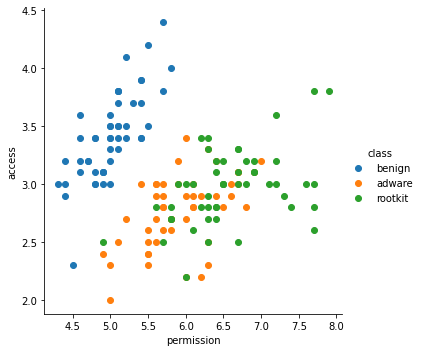

In [6]:
sns.FacetGrid(data,hue='class',size=5)\
.map(plt.scatter,'permission','access')\
.add_legend()

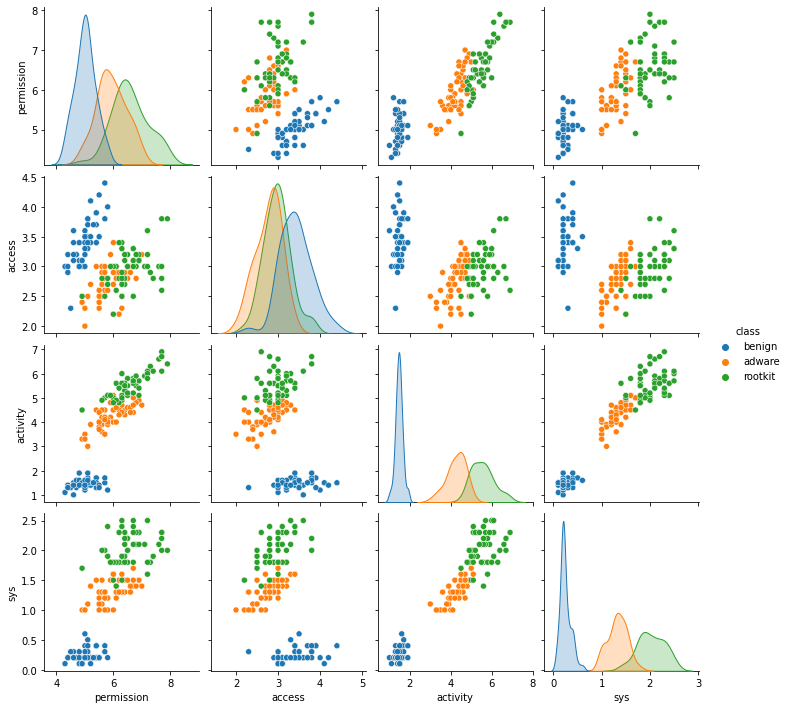

In [7]:
sns.pairplot(data,hue='class')

<a id="7"></a> <br>
## 7- Prepare Train and Test

scikit-learn provides a helpful function for partitioning data, train_test_split, which splits out your data into a training set and a test set.

Training and test usually is 70% for training and 30% for test

- Training set for fitting the model
- Test set for evaluation only

In [8]:
X = data.iloc[:, :-1].values    #   X -> Feature Variables
y = data.iloc[:, -1].values #   y ->  Target

In [9]:
# Splitting the data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [10]:
display(HTML(f"""
   
        <ul class="list-group">
          <li class="list-group-item disabled" aria-disabled="true"><h4>Shape of Train and Test Dataset</h4></li>
          <li class="list-group-item"><h4>Number of rows in Train dataset is: <span class="label label-primary">{ X_train.shape[0]:,}</span></h4></li>
          <li class="list-group-item"> <h4>Number of columns Train dataset is <span class="label label-primary">{X_train.shape[1]}</span></h4></li>
          <li class="list-group-item"><h4>Number of rows in Test dataset is: <span class="label label-success">{ X_test.shape[0]:,}</span></h4></li>
          <li class="list-group-item"><h4>Number of columns Test dataset is <span class="label label-success">{X_test.shape[1]}</span></h4></li>
        </ul>
  
    """))

<a id="8"></a> <br>
## 8- Machine Learning Algorithms
<img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/12/Classification-Machine-Learning-Algorithms-Edureka.png">
Image credit:edureka.co 



<a id="9"></a> <br>
## 8-1 Linear Regression

It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we establish relationship between independent and dependent variables by fitting a best line. This best fit line is known as regression line and represented by a linear equation **Y= a *X + b.

In [11]:
#converting object data type into int data type using labelEncoder for Linear reagration in this case

XL = data.iloc[:, :-1].values    #   X -> Feature Variables
yL = data.iloc[:, -1].values #   y ->  Target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train= le.fit_transform(yL)

print(Y_train)  # this is Y_train categotical to numerical


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# This is only for Linear Regretion 
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, Y_train, test_size = 0.3, random_state = 0)


In [13]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(X_trainL, y_trainL)

Y_pred = modelLR.predict(X_testL)

In [14]:
from sklearn import metrics
#calculating the residuals
print('y-intercept             :' , modelLR.intercept_)
print('beta coefficients       :' , modelLR.coef_)
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))
print('r2 value                :' ,metrics.r2_score(y_testL,Y_pred))

y-intercept             : -1.0840658977772517
beta coefficients       : [-0.0164041   0.5807508  -0.19501233  0.99927566]
Mean Abs Error MAE      : 0.5953388682838792
Mean Sqrt Error MSE     : 0.5203102653201008
Root Mean Sqrt Error RMSE: 0.7213253533046657
r2 value                : 0.161123975100952


<a id="10"></a> <br>
## 8-2 Decision Tree

This is one of my favorite algorithm and I use it quite frequently. It is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible. 


In [15]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<a id="11"></a> <br>
## 8-3 RandomForest

Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

In [16]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 16  0]
 [ 1  0 11]]
accuracy is  0.9777777777777777


<a id="12"></a> <br>
## 8-4 Logistic Regression

Don’t get confused by its name! It is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

In [17]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<a id="13"></a> <br>
## 8-5 K-Nearest Neighbors

It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

In [18]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<a id="14"></a> <br>
## 8-6 Naive Bayes

It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

In [19]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      1.00      1.00        18
      benign       1.00      1.00      1.00        16
     rootkit       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[18  0  0]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 1.0


<a id="15"></a> <br>
## 8-7 SVM

It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as Support Vectors)

In [20]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<a id="16"></a> <br>
## 8-8 Nu-Support Vector Classification

Similar to SVC but uses a parameter to control the number of support vectors.

The implementation is based on libsvm.

In [21]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

Model = NuSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<a id="17"></a> <br>
## 8-9 Linear Support Vector Classification

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [22]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.83      0.91        18
      benign       1.00      1.00      1.00        16
     rootkit       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

[[15  0  3]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 0.9333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


<a id="18"></a> <br>
##  8-10 Radius Neighbors Classifier

In scikit-learn RadiusNeighborsClassifier is very similar to KNeighborsClassifier with the exception of two parameters. First, in RadiusNeighborsClassifier we need to specify the radius of the fixed area used to determine if an observation is a neighbor using radius. Unless there is some substantive reason for setting radius to some value, it is best to treat it like any other hyperparameter and tune it during model selection. The second useful parameter is outlier_label, which indicates what label to give an observation that has no observations within the radius - which itself can often be a useful tool for identifying outliers.


In [23]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

      adware       0.00      0.00      0.00        18
      benign       0.00      0.00      0.00        16
     rootkit       0.24      1.00      0.39        11

    accuracy                           0.24        45
   macro avg       0.08      0.33      0.13        45
weighted avg       0.06      0.24      0.10        45

[[ 0  0 18]
 [ 0  0 16]
 [ 0  0 11]]
accuracy is  0.24444444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id="19"></a> <br>
##  8-11 Passive Aggressive Classifier

PA algorithm is a margin based online learning algorithm for binary classification.
Unlike PA algorithm, which is a hard-margin based method, PA-I algorithm is a soft margin based method and robuster to noise.

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       0.72      1.00      0.84        18
      benign       1.00      1.00      1.00        16
     rootkit       1.00      0.36      0.53        11

    accuracy                           0.84        45
   macro avg       0.91      0.79      0.79        45
weighted avg       0.89      0.84      0.82        45

[[18  0  0]
 [ 0 16  0]
 [ 7  0  4]]
accuracy is 0.8444444444444444


<a id="20"></a> <br>
##  8-12 BernoulliNB

Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [25]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       0.00      0.00      0.00        18
      benign       0.00      0.00      0.00        16
     rootkit       0.24      1.00      0.39        11

    accuracy                           0.24        45
   macro avg       0.08      0.33      0.13        45
weighted avg       0.06      0.24      0.10        45

[[ 0  0 18]
 [ 0  0 16]
 [ 0  0 11]]
accuracy is 0.24444444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id="21"></a> <br>
## 8-13  ExtraTreeClassifier

ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.
Let’s look at some ensemble methods ordered from high to low variance, ending in ExtraTreesClassifier.

In [26]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<a id="22"></a> <br>
## 8-14 Bagging classifier 

 Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [27]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 16  0]
 [ 1  0 11]]
accuracy is  0.9777777777777777


<a id="23"></a> <br>
##  8-15 AdaBoost classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       0.85      0.94      0.89        18
      benign       1.00      1.00      1.00        16
     rootkit       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45

[[17  0  3]
 [ 0 16  0]
 [ 1  0  8]]
accuracy is  0.9111111111111111


<a id="24"></a> <br>
## 8-16  Gradient Boosting Classifier

GBM is a boosting algorithm used when we deal with plenty of data to make a prediction with high prediction power. Boosting is actually an ensemble of learning algorithms which combines the prediction of several base estimators in order to improve robustness over a single estimator. It combines multiple weak or average predictors to a build strong predictor.

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 16  0]
 [ 1  0 11]]
accuracy is  0.9777777777777777


<a id="25"></a> <br>
## 8-17 Linear Discriminant Analysis

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 16  0]
 [ 1  0 11]]
accuracy is  0.9777777777777777


<a id="26"></a> <br>
## 8-18 Quadratic Discriminant Analysis

A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class.

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      adware       1.00      0.94      0.97        18
      benign       1.00      1.00      1.00        16
     rootkit       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 16  0]
 [ 1  0 11]]
accuracy is  0.9777777777777777


<a id="27"></a> <br>
## 8-19  K- means 

It is a type of unsupervised algorithm which solves the clustering problem. Its procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). Data points inside a cluster are homogeneous and heterogeneous to peer groups.

Remember figuring out shapes from ink blots? k means is somewhat similar this activity. You look at the shape and spread to decipher how many different clusters / population are present!

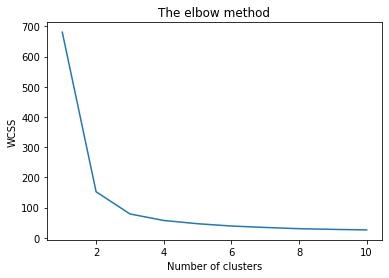

In [32]:
x = data.iloc[:, [0, 1, 2, 3]].values

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [33]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

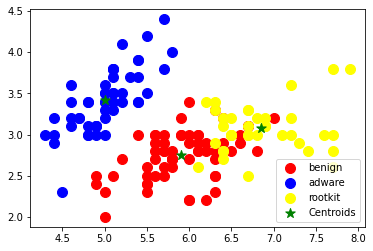

In [34]:
#Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'benign')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'adware')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'rootkit')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids',marker='*')

plt.legend()